<b>ANN-Regression - PyTorch</b> <br>
<i>Implementing ANN regression using only PyTorch, step-by-step. </i>

<b>requirements</b>

In [10]:
# example:- pip install numpy

<b>imports</b>

In [11]:
# imports
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\alvee\AppData\Local\Temp\ipykernel_16700\3161731933.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


<b>(1) DATA PRE-PROCESSING</b>

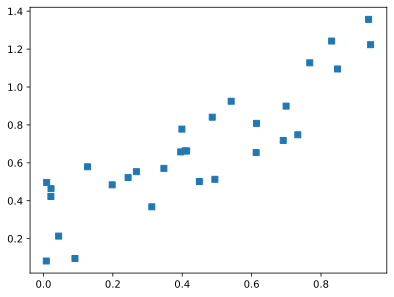

In [12]:
# Creating Synthetic Dataset 
N = 30 

# Feature-Matrix (X) & Dependent-Variable(y)
x = torch.rand(N,1) # Creating x = 30 random numbers
y = x + torch.rand(N,1)/2

# Data-Splitting 
# Data Pre-Processing
# Normalize (if needed)

# Data Visualization
plt.plot(x,y,'s') # random plot every time code is run as random numbers. seed to prevent
plt.show() # uncomment to see 

<b>(2) DL MODEL</b>

In [13]:
"""
X (Input_Layer)(1-Node) ---> σ(Non-Linear Act Func) ---> (Another_Layer)(1-Node) --> ŷ (model predicted output)  
"""
# This is how to build models in Pytorch, the ANN_regressor object contains our perceptron model 
ANN_reressor = nn.Sequential(
    nn.Linear(1,1), # Input Layer, 1 Node | (1,1) = (1 input and 1 output) , has bias-term
    nn.ReLU(), # Non-Linearity added infront of input Layer
    nn.Linear(1,1) # output Layer / another layer, 1 Node | (1,1) = (1 input and 1 output), has bias-term
)
print(ANN_reressor) # the object that contains our perceptron model 

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)


<b>(3) PARAMETERS</b>

In [14]:
# Setting-up Metaparameters 
learning_rate = 0.05
loss_function = nn.MSELoss()
# optimizer (The flavour of GD to be used) - stochastic gradient descent
optimizer = torch.optim.SGD(ANN_reressor.parameters(), lr=learning_rate) 

<b>(4) MODEL TRAINING</b>

In [15]:
#Train the Model 
number_of_epochs = 500
losses = torch.zeros(number_of_epochs)

# Training - EVERY DL MODEL WILL HAVE THE BELOW FORMAT OF TRAINING 
# FOR TRAINING EPOCH (Forward-prop --> Compute Loss --> Back-Prop)
for epoch in range(number_of_epochs): # epochs = number of iters we do training 
    
    # (1) FORWARD-PROPAGATION
    y_hat = ANN_reressor(x) # Take input X and pass to Perceptron Model and get final model predicted-output y_hat
    
    # (2) COMPUTE LOSS
    loss = loss_function(y_hat,y) # MSE squared difference of predicted(y_hat) and actual(y) values
    losses[epoch] = loss # stores the loss for a particular training epoch
    
    # (3) BACK-PROPAGATION
    optimizer.zero_grad() # re-inintialize the gradients, set all derivs to 0 for each training epoch
    loss.backward() # takes the loss backwards through the model right <-- Left
    optimizer.step() # ??
    

<b>(5) PREDICTION</b>

In [16]:
# Manually Compute Loss : MSE 
# final forward pass
predictions = ANN_reressor(x)

<b>(6) EVALUATION-VISUALIZATION</b>

In [17]:
# final loss (my code of MSE)
test_loss = (predictions-y).pow(2).mean()

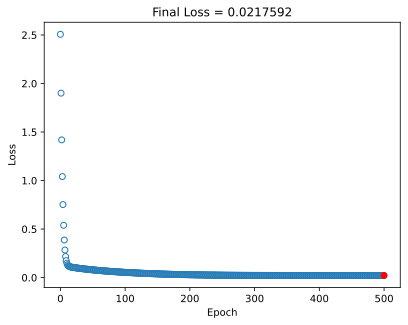

A pytorch tensor
tensor(0.0218, grad_fn=<MeanBackward0>)
tensor(0.0218)
0.02175920084118843


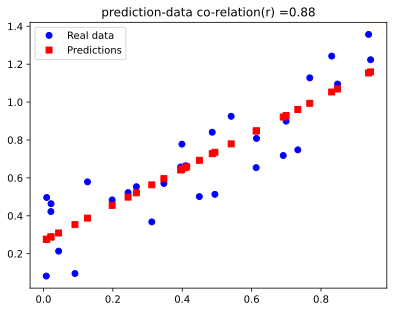

In [18]:
# ploting Loss
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth=0.1)
plt.plot(number_of_epochs, test_loss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = %g' %test_loss.item())
plt.show() 

"""
So the loss downs around 200 epochs ,no need for 500. after 200 epochs the model doesnt learn anything

"""
print("A pytorch tensor")
print(test_loss) # a pytorch tensor, grad_fn :a gradient function attached to this var
print(test_loss.detach()) # just gives the number as tensor and detaches all other info
print(test_loss.item()) # gives the number as numeric val and detaches all other info

##### Plotting data #####
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
# calculating corelation coefficient between observed and predicted data. Higher corelation means better predicted
plt.title(f'prediction-data co-relation(r) ={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

<b>CONCLUSION</b>
- ann regression using pytorch